# Clustering on Figueroa data

Aims:
- reproduce the Figueroa patient clusters (16 clusters) and assign the same labels as in Figueroa 2009
- for each cluster, obtain signature genes and plot the heatmap
- determine the best strategy for clustering the gene probes

In [53]:
library(ade4)
library(hashmap)
library(gdata)
library(pheatmap)
library(viridis)
library(impute)
library(NbClust)
library(factoextra)
library(reshape2)

In [2]:
# load RNAseq and methylation data
#rnaseq <- read.csv('../data/Figueroa/data/GEP-filtered.tsv', sep='\t', stringsAsFactor=F,
#                       header=T) # Affymetrix Human Genome U133 Plus 2.0 Array
methylation <- read.csv('../data/Figueroa/data/methylation-filtered.tsv', sep='\t', stringsAsFactor=F,
                       header=T)
sd.methylation <- apply(methylation[,-seq(2)], 1, function(x) sd(x))
probes.idx <- sd.methylation > 1
sum(sd.methylation > 1) # 3745 matching number from Figueroa
methylation.filtered <- methylation[probes.idx,]

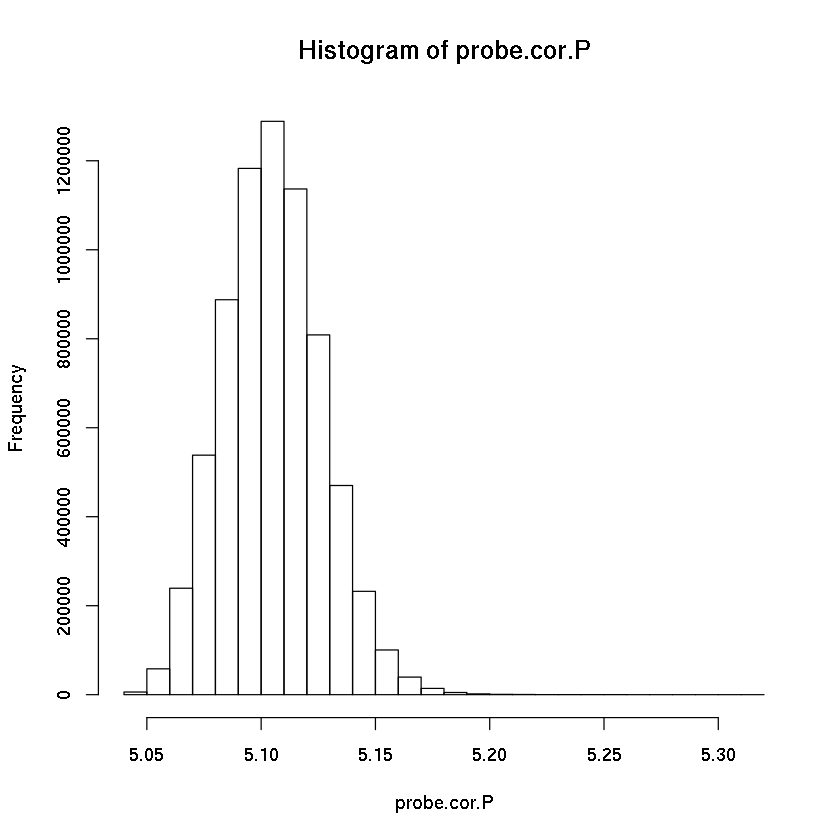

In [4]:
# 1 - pearson transformed into euclidean to allow using Ward clustering
probe.cor.P <- lingoes(as.dist(1 - cor(t(data.matrix(methylation.filtered[,-seq(2)])), method='pearson')))
hist(probe.cor.P)

In [20]:
# clustering on patients (1 - pearson correlation, ward clustering )
dist.matrix <- as.dist(1 - cor(methylation.filtered[,-seq(2)], method='pearson'))
dist.matrix.euc <- lingoes(dist.matrix)
clustering <- hclust(dist.matrix.euc, method='ward.D')
cluster.membership <- cutree(clustering, k = 16)
sort(table(cluster.membership))

cluster.membership
12  8 15 16 13  9 11  7  6  5  3  1  2 14  4 10 
 6  8  9  9 10 12 12 14 18 24 26 31 31 34 45 55 

In [6]:
# obtain the patient ID for each cluster
patients.id <- list(c(2172, 2189, 2202, 2215, 3309, 5353, 5365, 6363, 6881, 7150, 2235, 2249, 
                     2254, 2274, 2287, 2293, 2647, 3329, 6243, 6717, 6891, 7079, 7139, 7315, 7402, 7412),
                   c(2686, 3483, 3491, 6247, 7075, 7185, 2190, 2228, 2664, 6454, 7117, 7177, 2186,
                    2250, 2276, 2283, 2290, 2301, 2327, 2747, 2757, 3308, 3313, 3318, 3323, 4338,
                    5288, 5290, 5349, 5350, 5354, 5361, 5363, 6240, 6357, 6359, 6373, 6375, 6449, 6450, 6453, 6458, 7073, 7116,
                    7118, 7136, 7143, 7151, 7167, 7304, 7311, 7312, 7325, 7419, 7423),
                   c(2237, 2192, 3327, 2204, 2210, 2762, 2751, 2197, 2200, 2208, 2243, 2245, 2259, 2267,
                    2297, 2549, 2749, 2752, 2767, 2769, 3332, 5283, 5357, 6365, 6372, 6457, 6889, 7062,
                    7081, 7114, 7403),
                   c(1316, 2218, 2230, 2234, 2240, 2242, 2253, 2273, 2545, 2748, 2753, 6376, 7148, 7406),
                   c(7324, 7070, 7172, 7308, 2247, 2280, 2307, 2666, 2756, 3310, 3481, 4337, 4339, 4342, 
                    5355, 6236, 6356, 6370, 6374, 6379, 6455, 7058, 7059, 7071, 7077, 7084, 7137, 7146, 
                    7183, 7187, 7307, 7317, 7320, 7408),
                   c(322, 1448, 2170, 2179, 2219, 2265, 7134, 7273),
                   c(2188, 7302, 2226, 1188, 1299, 1432, 2199, 2203, 2216, 2220, 2229, 2268, 2300, 2305,
                    2326, 2764, 2765, 3492, 4335, 5289, 5348, 6456, 6887, 7147, 7154, 7161, 7180, 7301,
                    7326, 7418, 7420),
                   c(5356, 5359, 7323, 2207, 2288, 2292, 5291, 5351, 6237, 6238, 6239, 6448, 7051, 7067, 
                     7072, 7074, 7122, 7168, 7169, 7176, 7303, 7316, 7319, 7416),
                   c(4341, 6462, 4336, 6735, 6975, 7127, 7309, 5364, 7186),
                   c(2238, 2668, 3314, 6947, 7076, 5360),
                   c(6882, 2217, 2285, 3316, 5358, 6364, 7166, 7178, 7306),
                   c(2255, 2177, 2236, 2246, 2271, 2286, 2299, 2754, 6463, 7052, 7145, 7421),
                   c(2176, 2206, 4334, 2191, 2244, 1747, 2181, 2182, 2183, 2185, 2198, 2257, 2261, 2275, 
                     2278, 2282, 2284, 2289, 2291, 2670, 2672, 2771, 3311, 3312, 3321, 4333, 5286, 6241,
                    6371, 6378, 7119, 7121, 7124, 7125, 7131, 7188, 7305, 7310, 7314, 7318, 7322, 7328, 
                     7407, 7413, 7414),
                   c(2194, 1174, 2173, 2175, 2193, 2209, 2214, 2224, 2227, 2239, 2306, 3320, 3328, 3489,
                    4340, 5287, 6945, 7115),
                   c(5352, 5362, 7142, 1595, 2171, 2223, 2248, 2256, 2260, 2279, 3484, 3493),
                   c(1766, 2187, 2195, 2241, 2296, 3330, 3331, 5282, 7313, 7411))

In [7]:
patients.methylation <- read.csv('../data/Figueroa/data/GSE18700-samples.tsv', sep='\t', header=T, stringsAsFactor=F)
patients.map <- hashmap(patients.methylation$Title, patients.methylation$Accession) # map from ID to accession

In [8]:
# load methylation gene signature for each clusters
n <- 16
clusters <- list()
for (i in seq(n)) {
    clusters[[i]] <- read.xls('../data/mmc3.xls', sheet=i, skip=1, header=T, stringsAsFactor=F)
}

In [14]:
plotCluster <- function(idx) {
    for (i in idx) {
        patients.idx <- (colnames(methylation) %in% patients.map[[patients.id[[i]]]])[-seq(2)]
        probes.idx <- which(methylation$Gene %in% clusters[[i]][,1])
        cluster.data <- data.matrix(methylation[probes.idx, -seq(2)])#patients.idx]
        # z score transformation
        
        dist.matrix <- lingoes(as.dist(1 - cor(cluster.data, method='pearson')))
        clustering <- hclust(dist.matrix)
        
        cluster.zscore <- apply(cluster.data, 2, function(x) scale(x))
            
        colnames(cluster.zscore) <- colnames(cluster.data)
        annotation <- data.frame(cluster=factor(patients.idx))
        rownames(annotation) <- colnames(cluster.data)

        res <- pheatmap(
          mat               = cluster.data, 
          annotation_col    = annotation,
          annotation_legend = F,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          cluster_cols      = clustering,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_distance_rows = 'correlation',
          clustering_method = "complete",
          fontsize          = 14,
          main              = paste0("patient cluster ", i)
        )
    }
}


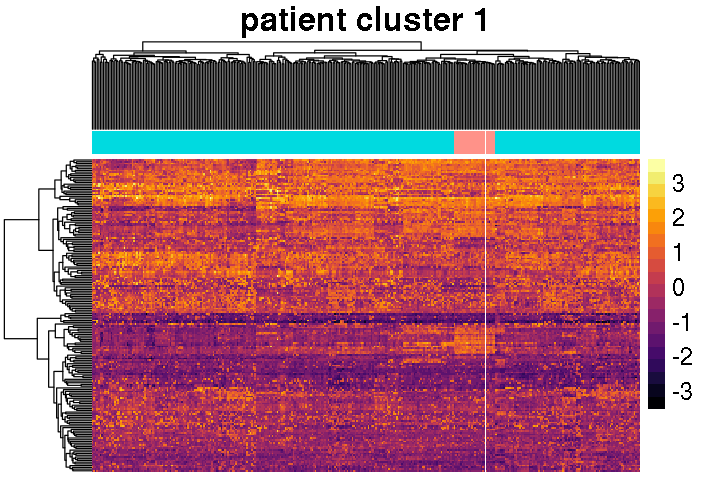

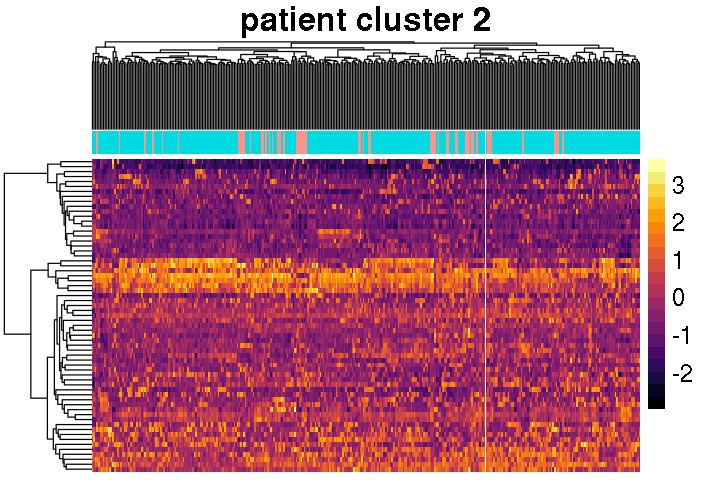

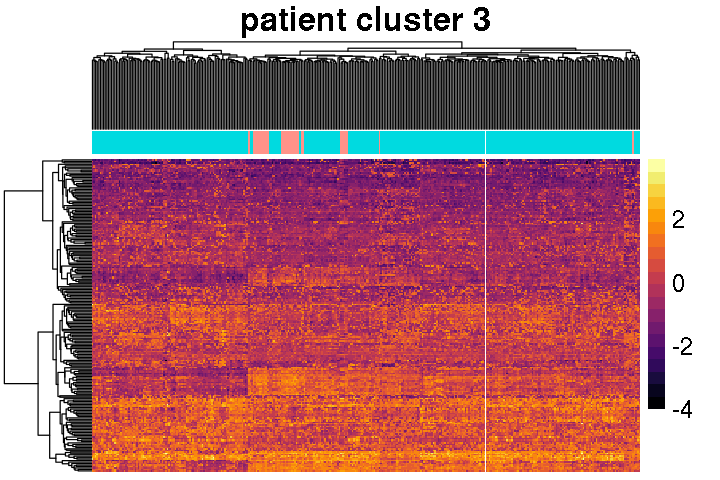

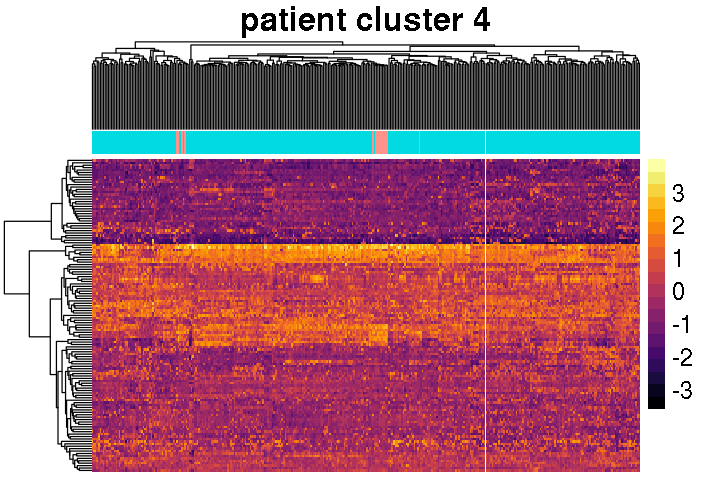

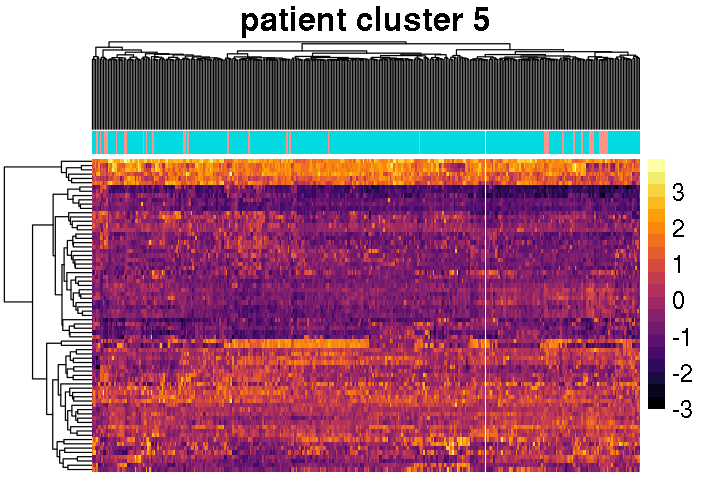

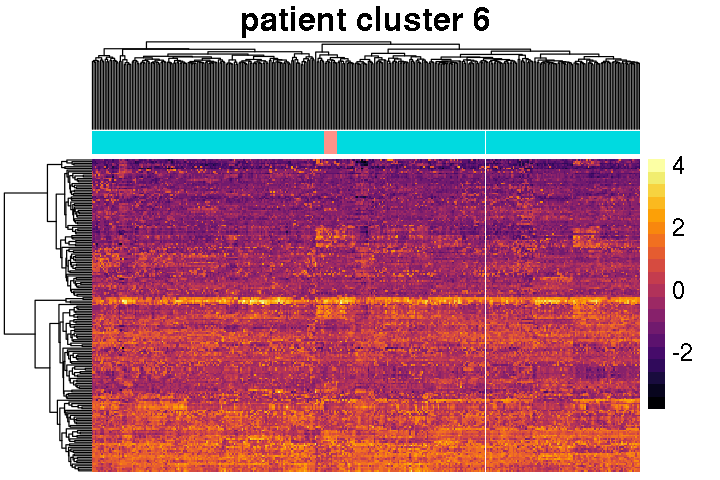

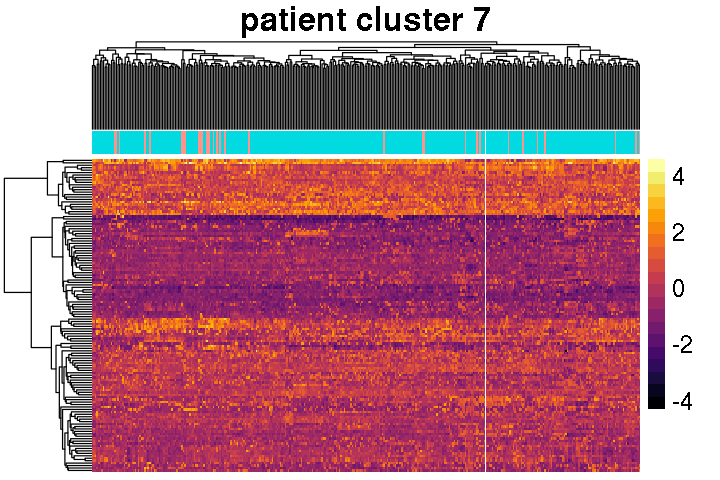

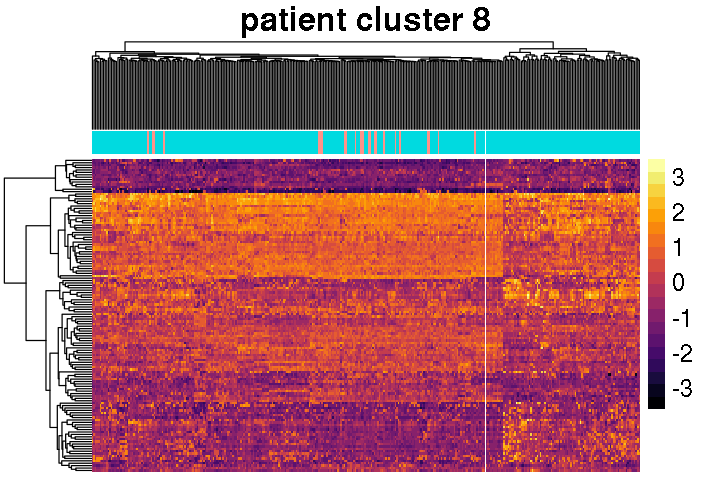

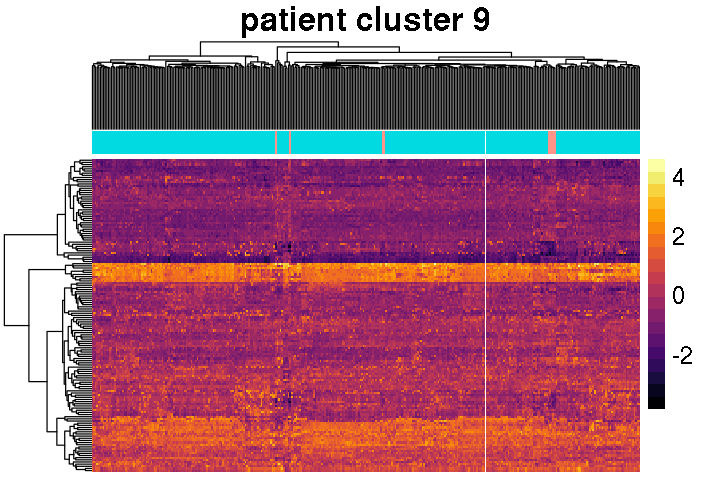

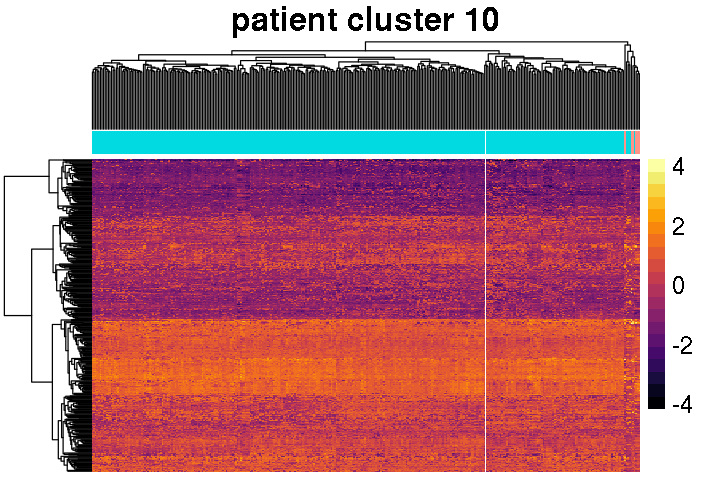

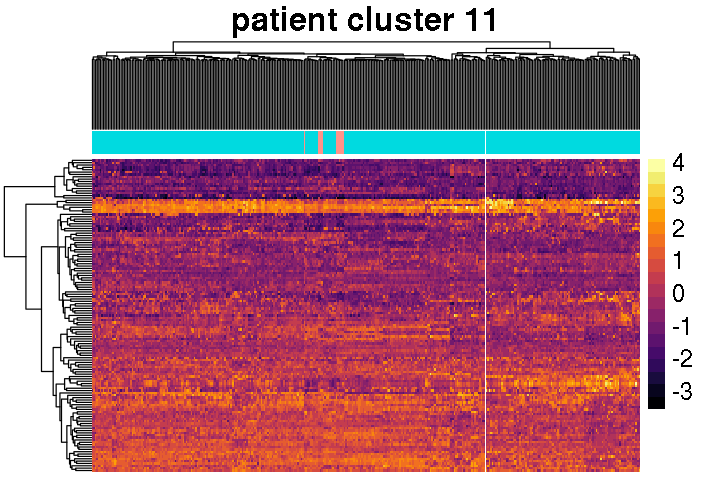

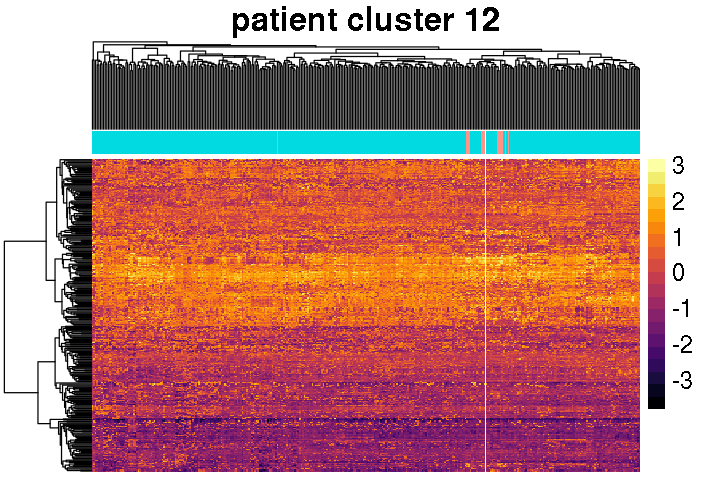

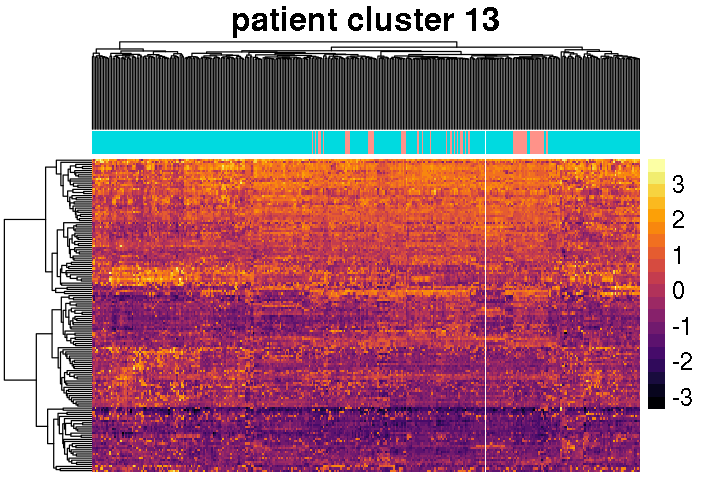

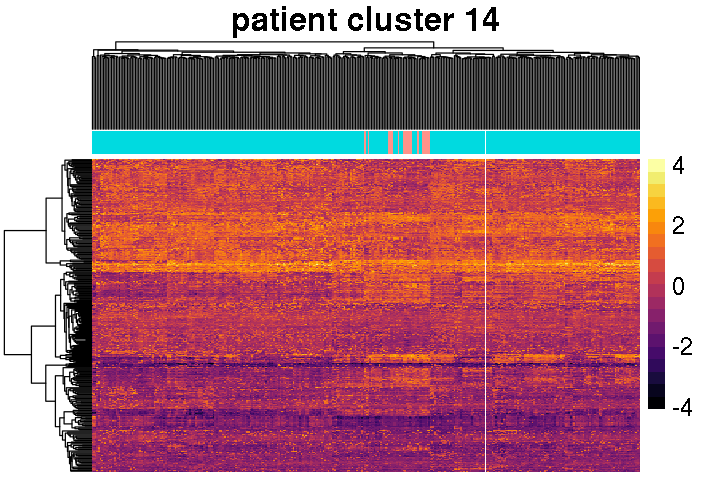

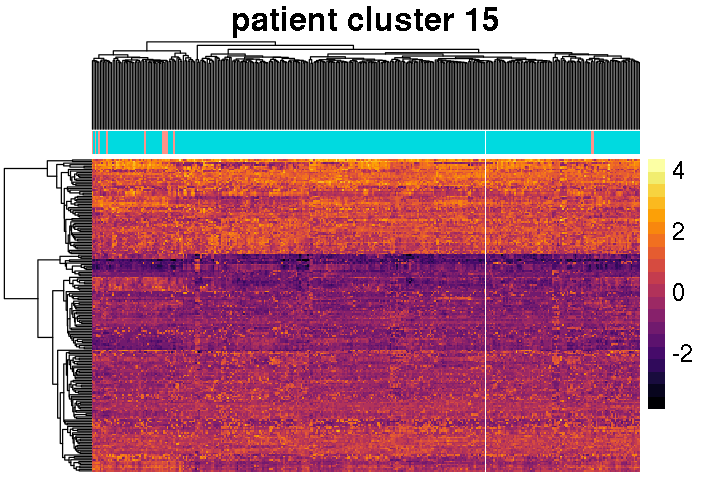

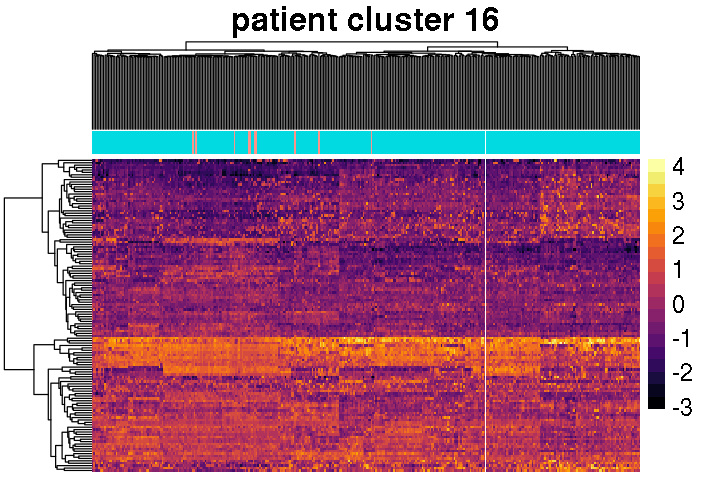

In [15]:
options(repr.plot.width=6, repr.plot.height=4)
plotCluster(1:16)

### Methylation aberrant signature derived from comparison with normal samples for each cluster does not well represent the patient cluster. The patient cluster doesn't all cluster together. 

## Clustering using methylation probes with sd > 1 across patients

In [16]:
cluster.data <- methylation.filtered[,-seq(2)]
cluster.zscore <- apply(cluster.data, 2, function(x) scale(x))
colnames(cluster.zscore) <- colnames(cluster.data)

In [17]:
ID = rep(0, dim(cluster.zscore)[2])
for (i in seq(n)) {
    ID[colnames(cluster.zscore) %in% patients.map[[patients.id[[i]]]]] <- i
}
annotation = data.frame(ID=factor(ID))
rownames(annotation) = colnames(cluster.zscore)

In [137]:
reorder_cormat <- function(cormat, hc){
    # Use correlation between variables as distance
    cormat <-cormat[hc$order, hc$order]
}

get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat, diag=T)] <- NA
    return(cormat)
}
  # Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat, diag=T)]<- NA
    return(cormat)
}

# determine the optimal number of clusters using elbow method
wss <- function(d) { # within cluster sum of square
  sum(scale(d, scale = FALSE)^2)
}
wrap <- function(i, hc, x) { # wrapper for wss, i: number of clusters, hc: hclust object, x: original data
  cl <- cutree(hc, i)
  spl <- split(x, cl)
  wss <- sum(sapply(spl, wss)) # sum of WSS for all clusters
  wss 
}

In [241]:
cluster.data.raw <- cluster.data
for (i in seq(5)) {
    cluster.data.raw <- t(data.matrix(apply(cluster.data.raw, 1, scale)))
    cluster.data.raw <- data.matrix(apply(cluster.data.raw, 2, scale))
}

In [242]:
summary(apply(cluster.data.raw, 1, mean))
summary(apply(cluster.data.raw, 2, mean))
summary(apply(cluster.data.raw, 1, sd))
summary(apply(cluster.data.raw, 2, sd))

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-2.756e-05 -6.748e-06  5.248e-07  0.000e+00  7.263e-06  2.479e-05 

      Min.    1st Qu.     Median       Mean    3rd Qu.       Max. 
-3.647e-17 -1.438e-17 -2.282e-18 -3.868e-19  1.245e-17  3.683e-17 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.001   1.001   1.001   1.001   1.001   1.001 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      1       1       1       1       1       1 

In [243]:
rownames(cluster.data.raw) <- rownames(cluster.zscore.row) <- rownames(cluster.zscore.col) <- methylation.filtered[,1]
colnames(cluster.data.raw) <- colnames(cluster.zscore.row) <- colnames(cluster.zscore.col) <- colnames(methylation.filtered)[-seq(2)]

In [245]:
clustering.correlation <- lingoes(as.dist(1 - cor(t(data.matrix(cluster.data.raw)), method='pearson')))
hclust.correlation <- hclust(clustering.correlation, method='ward.D2')

In [248]:
annotation.rows = data.frame(probe=factor(cutree(hclust.correlation, k = 10)))
rownames(annotation.rows) = rownames(cluster.data.raw)

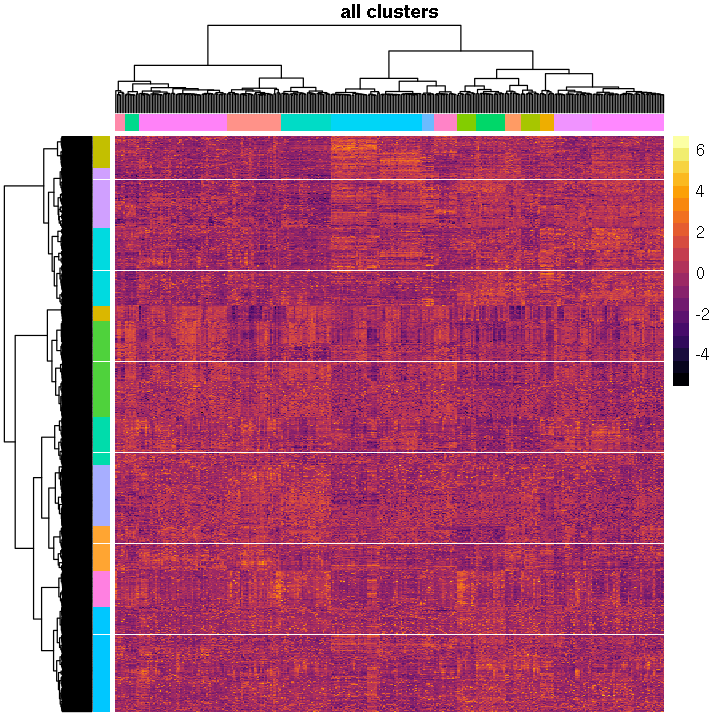

In [249]:
# clustering columns by correlation and complete linkage
options(repr.plot.height=6, repr.plot.width=6)
res <- pheatmap(
          mat               = cluster.data.raw, 
          annotation_col    = annotation,
          annotation_legend = F,
          annotation_names_col = F,
          annotation_row    = annotation.rows, 
          annotation_names_row = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_rows      = hclust.correlation,
          #fontsize          = 7,
          main              = paste0("all clusters")
        )

In [194]:
table(cutree(hclust.correlation, k=12))


  1   2   3   4   5   6   7   8   9  10  11  12 
517  98 437 457 238 371 397 319 270 318 153 170 

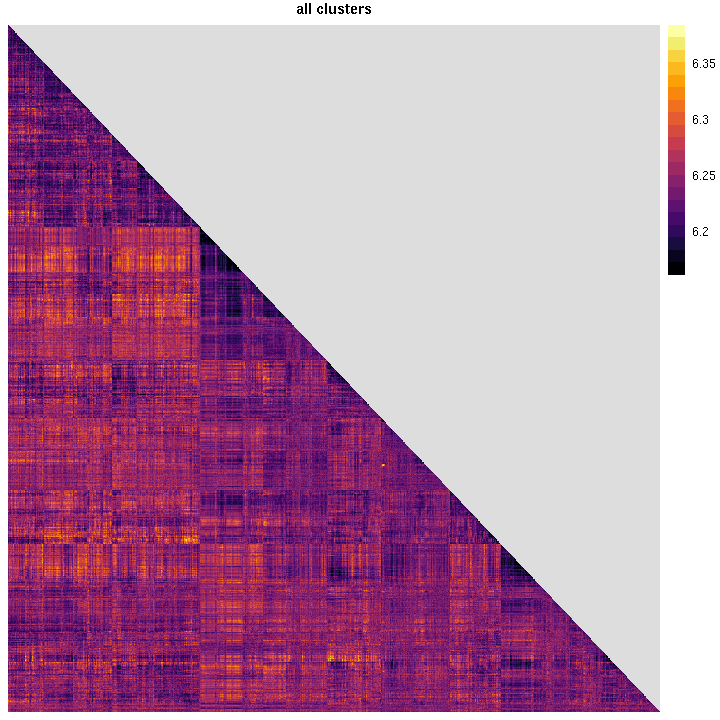

In [250]:
reordered.cormat <- reorder_cormat(as.matrix(clustering.correlation), hclust.correlation)
lower_tri <- get_lower_tri(reordered.cormat)

# clustering columns by 1-pearson with lingoes transformation to euclidean space and rows by euclidean
options(repr.plot.height=6, repr.plot.width=6)
res.plot <- pheatmap(
          mat               = lower_tri, 
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = F,
          cluster_rows      = F,
          fontsize          = 7,
          main              = paste0("all clusters")
        )

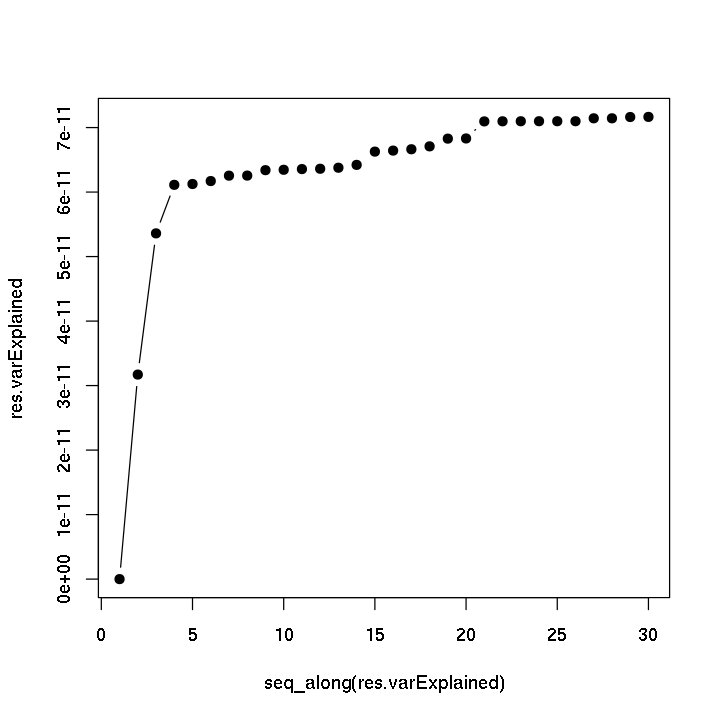

In [251]:
n = 30
res.wss <- sapply(seq(1, n), wrap, h = hclust.correlation, x = cluster.data.raw)

TSS <- res.wss[1]
res.varExplained <- sapply(res.wss, function(x) (TSS - x)/TSS)

plot(seq_along(res.varExplained), res.varExplained, type = "b", pch = 19)

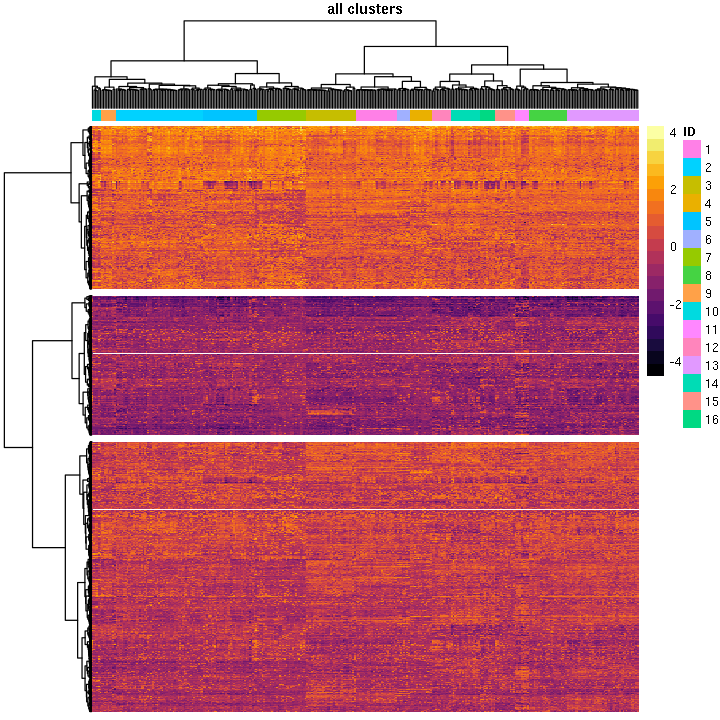

In [177]:
# clustering columns by 1-pearson with lingoes transformation to euclidean space and rows by euclidean
options(repr.plot.height=6, repr.plot.width=6)
res <- pheatmap(
          mat               = cluster.zscore, 
          annotation_col    = annotation,
          annotation_legend = T,
          annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = clustering,
          cluster_distance_rows = 'euclidean',
          clustering_method = 'ward.D2',
          fontsize          = 7,
          cutree_rows       = 3,
          main              = paste0("all clusters")
        )

In [170]:
clustering.euclidean <- dist(data.matrix(cluster.data), method='euclidean')
hclust.euclidean <- hclust(clustering.euclidean, method='ward.D2')

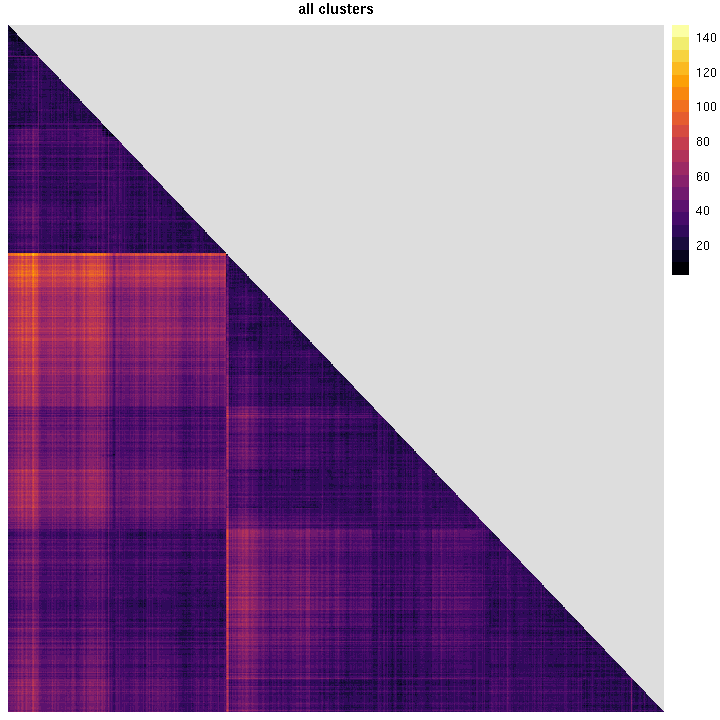

In [176]:
reordered.cormat <- reorder_cormat(as.matrix(clustering.euclidean), hclust.euclidean)
lower_tri <- get_lower_tri(reordered.cormat)

# clustering columns by 1-pearson with lingoes transformation to euclidean space and rows by euclidean
options(repr.plot.height=6, repr.plot.width=6)
res.plot <- pheatmap(
          mat               = lower_tri, 
          #annotation_col    = annotation,
          #annotation_legend = T,
          #annotation_names_col = F,
          color             = inferno(20),
          border_color      = NA,
          show_colnames     = FALSE,
          show_rownames     = FALSE,
          cluster_cols      = F,
          cluster_rows      = F,
          fontsize          = 7,
          #cutree_rows       = 4,
          main              = paste0("all clusters")
        )

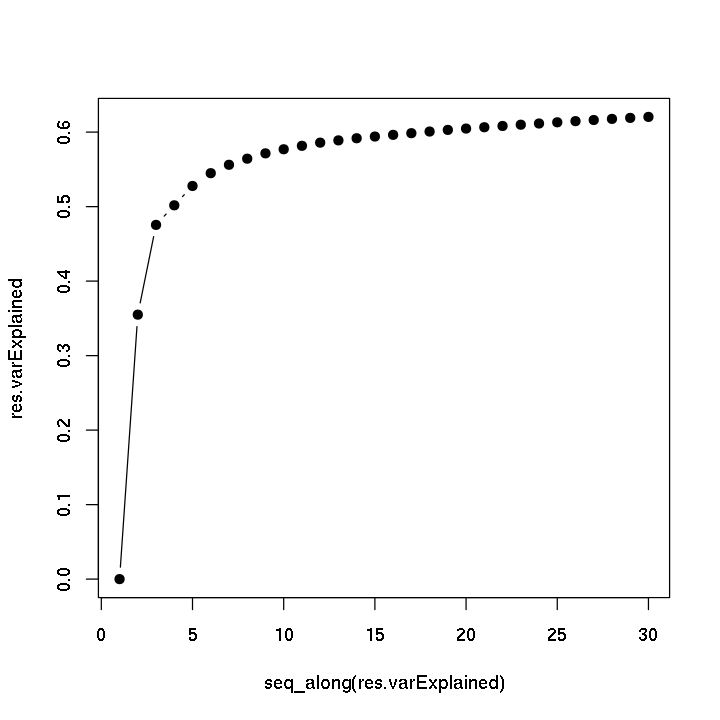

In [173]:
n = 30
res.wss <- sapply(seq(1, n), wrap, h = hclust.euclidean, x = cluster.data)

TSS <- res.wss[1]
res.varExplained <- sapply(res.wss, function(x) (TSS - x)/TSS)

plot(seq_along(res.varExplained), res.varExplained, type = "b", pch = 19)

In [ ]:
# save the probe clustering
res.clust <- cbind(cluster.zscore, 
                   cluster = cutree(res$tree_row, k = 4))
head(res.clust)

In [54]:
gene.names <- sapply(methylation.filtered$Name, function(x) strsplit(x, split='-')[[1]][1])
table(gene.names)[which(table(gene.names) > 2)] # with name NA 

gene.names
       BTBD3      C19orf24       C9orf24       C9orf79       CCDC108  
            3             3             3             3             3 
     CCDC85A          CHD5        CNTROB         DNAI1            HLA 
            3             3             3             3             4 
      KRTAP10        KRTAP5 LOC100129637     LOC150381            NA  
            6             3             3             3           315 
        RARB         RUSC1         TBL1Y           TNF          TPM1  
            3             4             3             3             3 
         TUB        ZNF667  
            3             3 